# Airplane Price Data Analysis

## Importing libraries

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing dataframe

In [191]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("asinow/airplane-price-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Duong\.cache\kagglehub\datasets\asinow\airplane-price-dataset\versions\1


In [192]:
df = pd.read_csv("C:\\Users\Duong\\.cache\\kagglehub\\datasets\\asinow\\airplane-price-dataset\\versions\\1\\airplane_price_dataset.csv")
df

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Duong\AppData\Local\Temp\ipykernel_38044\2596266533.py:1: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv("C:\\Users\Duong\\.cache\\kagglehub\\datasets\\asinow\\airplane-price-dataset\\versions\\1\\airplane_price_dataset.csv")


,Model,Üretim Yılı,Motor Sayısı,Motor Türü,Kapasite,Menzil (km),Yakıt Tüketimi (L/saat),Saatlik Bakım Maliyeti ($),Yaş,Satış Bölgesi,Fiyat ($)
0,Bombardier CRJ200,1987,2,Turbofan,50,3000,14.36,"2,185.43",36,Asya,"12,857,083.91"
1,Bombardier CRJ200,1997,2,Turbofan,50,3000,4.03,"1,202.08",26,Avrupa,"13,914,058.55"
2,Airbus A320,1988,2,Turbofan,180,6300,13.26,761.38,35,Avustralya,"90,735,695.86"
3,Boeing 737,2023,2,Turbofan,162,5700,14.61,592.63,0,Avustralya,"136,659,689.37"
4,Cessna 172,1985,1,Piston,4,1285,18.49,"4,245.99",38,Güney Amerika,"203,798.10"
...,...,...,...,...,...,...,...,...,...,...,...
12372,Boeing 777,1994,2,Turbofan,396,15600,12.16,"3,054.29",29,Avrupa,"389,807,070.36"
12373,Bombardier CRJ200,2005,2,Turbofan,50,3000,8.26,"3,107.67",18,Afrika,"15,938,876.07"
12374,Boeing 737,2015,2,Turbofan,162,5700,6.93,"3,972.16",8,Kuzey Amerika,"98,709,939.20"
12375,Cessna 172,2013,1,Piston,4,1285,14.28,999.84,10,Afrika,"396,520.67"


## EDA

Change headers name for easy reading

In [193]:
df = df.rename(columns={
    'Üretim Yılı': 'Production_Year',
    'Motor Sayısı': 'No_Engine',
    'Motor Türü': 'Engine_Type',
    'Kapasite': 'Capacity',
    'Menzil (km)': 'Range(KM)',
    'Yakıt Tüketimi (L/saat)': 'Fuel_Consump(L/hour)',
    'Saatlik Bakım Maliyeti ($)': 'Hourly_Maint_Cost($)',
    'Yaş': 'Age',
    'Satış Bölgesi': 'Sales_Region',
    'Fiyat ($)': 'Price($)'
})
df

,Model,Production_Year,No_Engine,Engine_Type,Capacity,Range(KM),Fuel_Consump(L/hour),Hourly_Maint_Cost($),Age,Sales_Region,Price($)
0,Bombardier CRJ200,1987,2,Turbofan,50,3000,14.36,"2,185.43",36,Asya,"12,857,083.91"
1,Bombardier CRJ200,1997,2,Turbofan,50,3000,4.03,"1,202.08",26,Avrupa,"13,914,058.55"
2,Airbus A320,1988,2,Turbofan,180,6300,13.26,761.38,35,Avustralya,"90,735,695.86"
3,Boeing 737,2023,2,Turbofan,162,5700,14.61,592.63,0,Avustralya,"136,659,689.37"
4,Cessna 172,1985,1,Piston,4,1285,18.49,"4,245.99",38,Güney Amerika,"203,798.10"
...,...,...,...,...,...,...,...,...,...,...,...
12372,Boeing 777,1994,2,Turbofan,396,15600,12.16,"3,054.29",29,Avrupa,"389,807,070.36"
12373,Bombardier CRJ200,2005,2,Turbofan,50,3000,8.26,"3,107.67",18,Afrika,"15,938,876.07"
12374,Boeing 737,2015,2,Turbofan,162,5700,6.93,"3,972.16",8,Kuzey Amerika,"98,709,939.20"
12375,Cessna 172,2013,1,Piston,4,1285,14.28,999.84,10,Afrika,"396,520.67"


In [194]:
df.describe()

,Production_Year,No_Engine,Capacity,Range(KM),Fuel_Consump(L/hour),Hourly_Maint_Cost($),Age,Price($)
count,"12,377.00","12,377.00","12,377.00","12,377.00","12,377.00","12,377.00","12,377.00","12,377.00"
mean,"2,001.48",1.84,190.41,"7,782.21",12.08,"2,744.09",21.52,"198,833,649.57"
std,12.77,0.37,142.66,"5,492.48",9.91,"1,293.21",12.77,"229,039,179.23"
min,"1,980.00",1.00,4.00,"1,285.00",2.00,500.02,0.00,"145,814.79"
25%,"1,990.00",2.00,50.00,"3,000.00",5.95,"1,627.26",10.00,"14,096,813.61"
50%,"2,001.00",2.00,162.00,"5,700.00",9.82,"2,744.33",22.00,"83,921,913.75"
75%,"2,013.00",2.00,350.00,"14,800.00",13.47,"3,848.84",33.00,"384,323,880.64"
max,"2,023.00",2.00,396.00,"15,600.00",49.97,"4,999.66",43.00,"978,213,228.63"


In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12377 entries, 0 to 12376
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 12377 non-null  object 
 1   Production_Year       12377 non-null  int64  
 2   No_Engine             12377 non-null  int64  
 3   Engine_Type           12377 non-null  object 
 4   Capacity              12377 non-null  int64  
 5   Range(KM)             12377 non-null  int64  
 6   Fuel_Consump(L/hour)  12377 non-null  float64
 7   Hourly_Maint_Cost($)  12377 non-null  float64
 8   Age                   12377 non-null  int64  
 9   Sales_Region          12377 non-null  object 
 10  Price($)              12377 non-null  float64
dtypes: float64(3), int64(5), object(3)
memory usage: 1.0+ MB


In [196]:
df.isna().sum()

Model                   0
Production_Year         0
No_Engine               0
Engine_Type             0
Capacity                0
Range(KM)               0
Fuel_Consump(L/hour)    0
Hourly_Maint_Cost($)    0
Age                     0
Sales_Region            0
Price($)                0
dtype: int64

In [197]:
df.duplicated().sum()

0

For easier usage, we will count each type of engine and sales region

In [198]:
engine_type = df.groupby("Engine_Type").size()
print(engine_type)

Engine_Type
Piston       2039
Turbofan    10338
dtype: int64


In [199]:
sales_region = df.groupby("Sales_Region").size()
print(sales_region)

Sales_Region
Afrika           2171
Asya             2017
Avrupa           2062
Avustralya       2071
Güney Amerika    2053
Kuzey Amerika    2003
dtype: int64


## Data cleaning

In [200]:
#Changing regions name to English for easy use

df['Sales_Region'] = df['Sales_Region'].replace({
    'Afrika': 'Africa',
    'Asya': 'Asia',
    'Avrupa': 'Europe',
    'Avustralya': 'Australia',
    'Güney Amerika': 'South America',
    'Kuzey Amerika': 'North America'
})
df

,Model,Production_Year,No_Engine,Engine_Type,Capacity,Range(KM),Fuel_Consump(L/hour),Hourly_Maint_Cost($),Age,Sales_Region,Price($)
0,Bombardier CRJ200,1987,2,Turbofan,50,3000,14.36,"2,185.43",36,Asia,"12,857,083.91"
1,Bombardier CRJ200,1997,2,Turbofan,50,3000,4.03,"1,202.08",26,Europe,"13,914,058.55"
2,Airbus A320,1988,2,Turbofan,180,6300,13.26,761.38,35,Australia,"90,735,695.86"
3,Boeing 737,2023,2,Turbofan,162,5700,14.61,592.63,0,Australia,"136,659,689.37"
4,Cessna 172,1985,1,Piston,4,1285,18.49,"4,245.99",38,South America,"203,798.10"
...,...,...,...,...,...,...,...,...,...,...,...
12372,Boeing 777,1994,2,Turbofan,396,15600,12.16,"3,054.29",29,Europe,"389,807,070.36"
12373,Bombardier CRJ200,2005,2,Turbofan,50,3000,8.26,"3,107.67",18,Africa,"15,938,876.07"
12374,Boeing 737,2015,2,Turbofan,162,5700,6.93,"3,972.16",8,North America,"98,709,939.20"
12375,Cessna 172,2013,1,Piston,4,1285,14.28,999.84,10,Africa,"396,520.67"


In [201]:
#Changing exponential to number

pd.options.display.float_format = "{:,.2f}".format
df

,Model,Production_Year,No_Engine,Engine_Type,Capacity,Range(KM),Fuel_Consump(L/hour),Hourly_Maint_Cost($),Age,Sales_Region,Price($)
0,Bombardier CRJ200,1987,2,Turbofan,50,3000,14.36,"2,185.43",36,Asia,"12,857,083.91"
1,Bombardier CRJ200,1997,2,Turbofan,50,3000,4.03,"1,202.08",26,Europe,"13,914,058.55"
2,Airbus A320,1988,2,Turbofan,180,6300,13.26,761.38,35,Australia,"90,735,695.86"
3,Boeing 737,2023,2,Turbofan,162,5700,14.61,592.63,0,Australia,"136,659,689.37"
4,Cessna 172,1985,1,Piston,4,1285,18.49,"4,245.99",38,South America,"203,798.10"
...,...,...,...,...,...,...,...,...,...,...,...
12372,Boeing 777,1994,2,Turbofan,396,15600,12.16,"3,054.29",29,Europe,"389,807,070.36"
12373,Bombardier CRJ200,2005,2,Turbofan,50,3000,8.26,"3,107.67",18,Africa,"15,938,876.07"
12374,Boeing 737,2015,2,Turbofan,162,5700,6.93,"3,972.16",8,North America,"98,709,939.20"
12375,Cessna 172,2013,1,Piston,4,1285,14.28,999.84,10,Africa,"396,520.67"


## Data Analyzing

In [202]:
#Analyzing the number of each model of airplane

model_count = df["Model"].value_counts()
model_count = model_count.sort_values(ascending=False)
print(model_count)

Model
Boeing 737           2121
Airbus A350          2107
Bombardier CRJ200    2051
Airbus A320          2048
Cessna 172           2039
Boeing 777           2011
Name: count, dtype: int64


Through analysing the number of airplane for each model, we can observe that the Boeing 737 model is the most common, with the Boeing 777 being the least common. However, quantities for each model are quite similar and does not differ significantly between first standing and last standing models.

In [203]:
#Analyzing the number of airplane for each sales region

region_count = df['Sales_Region'].value_counts()
region_count = region_count.sort_values(ascending=False)
print(region_count)

Sales_Region
Africa           2171
Australia        2071
Europe           2062
South America    2053
Asia             2017
North America    2003
Name: count, dtype: int64


Similarly, through analysing the number of airplane for sales region, we can observe that the quantities of sales for each region are similar without differing significantly. Africa has the highest sales, while North America has the lowest sales. 

In [204]:
#Analyzing the average price for each model of airplane accross different regions

av_price = df.pivot_table(values="Price($)", index="Model", columns=['Sales_Region'], aggfunc="mean")
print(av_price)

Sales_Region              Africa           Asia      Australia         Europe  \
Model                                                                           
Airbus A320       103,314,013.13 100,532,787.76 104,449,824.34  98,178,657.15   
Airbus A350       485,618,235.88 485,553,249.84 484,534,544.20 476,032,518.35   
Boeing 737         80,876,567.10  82,282,628.30  82,948,667.67  81,199,222.33   
Boeing 777        507,850,012.95 518,266,254.42 517,440,672.98 501,502,851.56   
Bombardier CRJ200  15,654,819.41  15,629,351.58  15,580,649.57  16,158,110.79   
Cessna 172            277,477.33     285,857.60     277,392.99     282,477.29   

Sales_Region       North America  South America  
Model                                            
Airbus A320        99,790,267.89 103,439,497.79  
Airbus A350       481,551,064.47 475,951,383.01  
Boeing 737         81,588,230.75  80,424,736.73  
Boeing 777        517,947,588.19 517,346,242.60  
Bombardier CRJ200  15,882,939.26  15,574,984.74  
C

Analysing the price for each model accross different regions, we can see that the pricing is quite similar for all regions, with little differences. The model with highest pricing is the Boeing 777, while the cheapest model is the Cessna 172.

#### Overall

Observing the distribution of price, models and quantities across regions, we can see that the distribution for all categories are quite evenly with no significant differences. However, observing the price and the quantities of each models, it is reasonable to assume that there is a correlation between variables (with the Boeing 777 being the highest pricing model and the lowest sales). We will clarify the correlations between variables in this dataset below:

### Correlation study

In [205]:
#Look up type again to check for object type data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12377 entries, 0 to 12376
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 12377 non-null  object 
 1   Production_Year       12377 non-null  int64  
 2   No_Engine             12377 non-null  int64  
 3   Engine_Type           12377 non-null  object 
 4   Capacity              12377 non-null  int64  
 5   Range(KM)             12377 non-null  int64  
 6   Fuel_Consump(L/hour)  12377 non-null  float64
 7   Hourly_Maint_Cost($)  12377 non-null  float64
 8   Age                   12377 non-null  int64  
 9   Sales_Region          12377 non-null  object 
 10  Price($)              12377 non-null  float64
dtypes: float64(3), int64(5), object(3)
memory usage: 1.0+ MB


In [206]:
#Find unique value for each column with datatype object

print(df['Engine_Type'].unique())
print(df['Model'].unique())
print(df['Sales_Region'].unique())

['Turbofan' 'Piston']
['Bombardier CRJ200' 'Airbus A320' 'Boeing 737' 'Cessna 172' 'Airbus A350'
 'Boeing 777']
['Asia' 'Europe' 'Australia' 'South America' 'Africa' 'North America']


In [207]:
#Giving each object an numerical value

df['Sales_Region'] = df['Sales_Region'].replace({
    'Africa': 0,
    'Asia': 1,
    'Europe': 2,
    'Australia': 3,
    'South America': 4,
    'North America': 5
})

df['Engine_Type'] = df['Engine_Type'].replace({
    'Turbofan': 0,
    'Piston': 1,
})

df['Model'] = df['Model'].replace({
    'Bombardier CRJ200': 0,
    'Airbus A320': 1,
    'Boeing 737': 2, 
    'Cessna 172': 3,
    'Airbus A350': 4,
    'Boeing 777': 5
})

df

C:\Users\Duong\AppData\Local\Temp\ipykernel_38044\244836713.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sales_Region'] = df['Sales_Region'].replace({
C:\Users\Duong\AppData\Local\Temp\ipykernel_38044\244836713.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Engine_Type'] = df['Engine_Type'].replace({
C:\Users\Duong\AppData\Local\Temp\ipykernel_38044\244836713.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly cal

,Model,Production_Year,No_Engine,Engine_Type,Capacity,Range(KM),Fuel_Consump(L/hour),Hourly_Maint_Cost($),Age,Sales_Region,Price($)
0,0,1987,2,0,50,3000,14.36,"2,185.43",36,1,"12,857,083.91"
1,0,1997,2,0,50,3000,4.03,"1,202.08",26,2,"13,914,058.55"
2,1,1988,2,0,180,6300,13.26,761.38,35,3,"90,735,695.86"
3,2,2023,2,0,162,5700,14.61,592.63,0,3,"136,659,689.37"
4,3,1985,1,1,4,1285,18.49,"4,245.99",38,4,"203,798.10"
...,...,...,...,...,...,...,...,...,...,...,...
12372,5,1994,2,0,396,15600,12.16,"3,054.29",29,2,"389,807,070.36"
12373,0,2005,2,0,50,3000,8.26,"3,107.67",18,0,"15,938,876.07"
12374,2,2015,2,0,162,5700,6.93,"3,972.16",8,5,"98,709,939.20"
12375,3,2013,1,1,4,1285,14.28,999.84,10,0,"396,520.67"


We will obtain the correlation between the dependent variable and other independent variables to further study the relationship of these variables to the dependent variable.

In [208]:
print(df.corr()['Price($)'])

Model                   0.75
Production_Year         0.20
No_Engine               0.39
Engine_Type            -0.39
Capacity                0.90
Range(KM)               0.92
Fuel_Consump(L/hour)   -0.31
Hourly_Maint_Cost($)   -0.02
Age                    -0.20
Sales_Region            0.00
Price($)                1.00
Name: Price($), dtype: float64


Through correlation values, we can see that sales region has no impact on the airplane price. However, other data all have a correlation to the main variable, with the most impacting variables being the airplane capacity, maximum range and airplane model.

## Data Visualization

### Correlation heatmap

In [209]:
g1 = sns.heatmap(data=df.corr())

As visualized on heatmap, we can see a strong relationship among most variables and dependent function. Based on this heatmap, we will create data visualization to clarify the relationship between such variables.

### Relationship between airplane model and capacity, range

In [210]:
#First, change the number value back to text value

df['Sales_Region'] = df['Sales_Region'].replace({
    0: 'Africa',
    1: 'Asia',
    2: 'Europe',
    3: 'Australia',
    4: 'South America',
    5: 'North America'
})

df['Engine_Type'] = df['Engine_Type'].replace({
    0: 'Turbofan',
    1: 'Piston',
})

df['Model'] = df['Model'].replace({
    0: 'Bombardier CRJ200',
    1: 'Airbus A320',
    2: 'Boeing 737', 
    3:'Cessna 172',
    4: 'Airbus A350',
    5: 'Boeing 777'
})

#Relationship between model and capacity

plt.figure(figsize=(4,6))
sns.barplot(data=df,x='Model',y='Capacity',
            hue='Engine_Type',
            legend=True,
            palette='pastel',
            )
plt.title('Capacity for each type of airplane model')
plt.xticks(rotation=45,ha='right')

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Bombardier CRJ200'),
  Text(1, 0, 'Airbus A320'),
  Text(2, 0, 'Boeing 737'),
  Text(3, 0, 'Cessna 172'),
  Text(4, 0, 'Airbus A350'),
  Text(5, 0, 'Boeing 777')])

In [211]:
#Relationship between model and maximum range

sns.barplot(data=df,x='Model',y='Range(KM)',
                palette='Set2',
                legend=True,
                hue='Engine_Type'
                )
plt.xticks(rotation=45,ha='right')
plt.title('Maximum range per fuel time for each model')
plt.ylabel('Range (Km)')

Text(8.097222222222223, 0.5, 'Range (Km)')

### Distribution of airplane price

In [212]:
sns.histplot(data=df, x='Price($)', bins=30, color="teal")
plt.locator_params(axis='x', nbins=30)
plt.xticks(rotation=60, ha='right')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.title('Distribution of airplane price')
plt.xlabel('Price ($)')
plt.ylabel('Quantity')

C:\Users\Duong\AppData\Local\Temp\ipykernel_38044\3347185909.py:2: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(axis='x', nbins=30)


Text(-9.652777777777777, 0.5, 'Quantity')

### Price range for each model of airplane

In [213]:
g1 = sns.boxplot(data=df, x='Model',y='Price($)',
            palette='pastel',
            width=0.5)
plt.xticks(rotation=45, ha='right')
g1.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, p: format(int(y), ',')))
plt.locator_params(axis='y', nbins=20)
plt.title('Price distribution of each airplane model')
plt.xlabel('Model')
plt.ylabel('Price ($)')

C:\Users\Duong\AppData\Local\Temp\ipykernel_38044\609169226.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g1 = sns.boxplot(data=df, x='Model',y='Price($)',


Text(-9.652777777777777, 0.5, 'Price ($)')

As I can see a quite obvious outliers for the Boeing 777 price, I'm curious to see which entry this is so we will go back a bit

In [214]:
df.sort_values(by='Price($)',ascending=False, inplace=True)
df.head(5)

,Model,Production_Year,No_Engine,Engine_Type,Capacity,Range(KM),Fuel_Consump(L/hour),Hourly_Maint_Cost($),Age,Sales_Region,Price($)
1573,Boeing 777,2021,2,Turbofan,396,15600,2.21,948.11,2,Australia,"978,213,228.63"
4697,Boeing 777,2023,2,Turbofan,396,15600,10.53,682.34,0,Asia,"955,609,820.43"
6729,Boeing 777,2022,2,Turbofan,396,15600,13.79,"3,400.89",1,Australia,"955,339,746.85"
7197,Boeing 777,2023,2,Turbofan,396,15600,10.33,"1,969.03",0,Australia,"942,637,210.98"
5370,Boeing 777,2023,2,Turbofan,396,15600,14.92,"3,029.35",0,Australia,"936,861,314.47"


Ah, so it's the 2 years-old Boeing 777 sold in Australia. Funny data point, given that most variables are similar to non-outlier entries, with the difference being a significantly low Fuel Consumption (L/hour). I might scratch this later

### Changes in pricing based on the age of the airplane for each airplane model

In [215]:
#Sort the value for easier observation
df.sort_values(by='Age',inplace=True)

#Plot the data
g1 = sns.lineplot(data=df, x='Age', y='Price($)',
                  hue='Model',
                  legend=True,
                  palette="Set2")
g1.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, p: format(int(y), ',')))
plt.title('Price variations based on airplane age for each airplane model')
plt.xlabel('Age')

Text(0.5, 34.54715460257994, 'Age')

In [216]:
#Overall relationship between price of airplane and its age

plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='Age', y='Price($)',
                  legend=True)
plt.title('Relationship between the price of airplanes and its age')
plt.ylabel('Price ($)')

Text(0, 0.5, 'Price ($)')

As shown on the graph, except for the model Cessna 172, the price for all models went down as the age of airplanes increase, and this trend is more obvious for more expensive models, such as Boeing 777 with the most variation in price. Overall, the price decreases as it ages. 

## Data modelling

### Data preparation

In [217]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [218]:
#Drop duplicate columns from dataset

df = df.drop('Production_Year',axis=1)
df

,Model,No_Engine,Engine_Type,Capacity,Range(KM),Fuel_Consump(L/hour),Hourly_Maint_Cost($),Age,Sales_Region,Price($)
3699,Bombardier CRJ200,2,Turbofan,50,3000,9.14,"3,254.67",0,North America,"28,937,666.14"
10267,Boeing 737,2,Turbofan,162,5700,4.83,616.72,0,Europe,"125,036,228.61"
12087,Boeing 737,2,Turbofan,162,5700,5.20,"2,982.93",0,Asia,"125,190,571.21"
3748,Bombardier CRJ200,2,Turbofan,50,3000,9.75,"4,088.70",0,Africa,"25,615,766.40"
2032,Boeing 737,2,Turbofan,162,5700,9.64,"4,580.90",0,Australia,"125,624,938.67"
...,...,...,...,...,...,...,...,...,...,...
1439,Airbus A320,2,Turbofan,180,6300,8.60,"2,774.84",43,Australia,"77,121,543.03"
7560,Airbus A320,2,Turbofan,180,6300,3.86,"3,578.89",43,North America,"87,661,445.04"
1378,Boeing 737,2,Turbofan,162,5700,8.68,"3,196.85",43,Asia,"51,782,642.24"
1608,Boeing 737,2,Turbofan,162,5700,13.83,"2,758.75",43,Africa,"67,387,160.43"


In [219]:
#Split dataset for training

df_train, df_test = train_test_split(df,train_size=0.7, random_state=42)
df_train.info(), df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8663 entries, 10304 to 7909
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 8663 non-null   object 
 1   No_Engine             8663 non-null   int64  
 2   Engine_Type           8663 non-null   object 
 3   Capacity              8663 non-null   int64  
 4   Range(KM)             8663 non-null   int64  
 5   Fuel_Consump(L/hour)  8663 non-null   float64
 6   Hourly_Maint_Cost($)  8663 non-null   float64
 7   Age                   8663 non-null   int64  
 8   Sales_Region          8663 non-null   object 
 9   Price($)              8663 non-null   float64
dtypes: float64(3), int64(4), object(3)
memory usage: 744.5+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 3714 entries, 1407 to 6765
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model 

(None, None)

In [220]:
df.head()

,Model,No_Engine,Engine_Type,Capacity,Range(KM),Fuel_Consump(L/hour),Hourly_Maint_Cost($),Age,Sales_Region,Price($)
3699,Bombardier CRJ200,2,Turbofan,50,3000,9.14,"3,254.67",0,North America,"28,937,666.14"
10267,Boeing 737,2,Turbofan,162,5700,4.83,616.72,0,Europe,"125,036,228.61"
12087,Boeing 737,2,Turbofan,162,5700,5.20,"2,982.93",0,Asia,"125,190,571.21"
3748,Bombardier CRJ200,2,Turbofan,50,3000,9.75,"4,088.70",0,Africa,"25,615,766.40"
2032,Boeing 737,2,Turbofan,162,5700,9.64,"4,580.90",0,Australia,"125,624,938.67"


In [221]:
scaler = StandardScaler()

numerical_features = list((df_train.columns[1], 
                           df_train.columns[3], 
                           df_train.columns[4], 
                           df_train.columns[5],
                           df_train.columns[6],
                           df_train.columns[7],
                           df_train.columns[9],))
df_train[numerical_features] = scaler.fit_transform(df_train[numerical_features])
df_train.sample(10)

,Model,No_Engine,Engine_Type,Capacity,Range(KM),Fuel_Consump(L/hour),Hourly_Maint_Cost($),Age,Sales_Region,Price($)
904,Airbus A320,0.44,Turbofan,-0.08,-0.28,-0.36,1.56,-1.37,Australia,-0.31
969,Cessna 172,-2.29,Piston,-1.32,-1.19,2.59,1.10,0.27,Europe,-0.87
10112,Cessna 172,-2.29,Piston,-1.32,-1.19,3.51,-0.56,-0.20,Australia,-0.87
7142,Airbus A320,0.44,Turbofan,-0.08,-0.28,-0.34,0.85,-0.36,Europe,-0.37
9729,Bombardier CRJ200,0.44,Turbofan,-1.00,-0.88,-0.78,0.56,0.97,Africa,-0.82
6582,Boeing 737,0.44,Turbofan,-0.21,-0.39,0.08,-1.51,1.36,Europe,-0.61
10529,Airbus A350,0.44,Turbofan,1.11,1.27,-0.92,-0.84,0.73,Australia,0.65
1786,Airbus A320,0.44,Turbofan,-0.08,-0.28,-0.44,1.11,-1.22,North America,-0.25
2621,Bombardier CRJ200,0.44,Turbofan,-1.00,-0.88,-0.52,1.06,0.50,Africa,-0.83
2250,Airbus A350,0.44,Turbofan,1.11,1.27,-0.33,1.55,-0.05,Europe,0.78


In [222]:
df_train = pd.get_dummies(df_train, drop_first=True)
df_train = df_train.replace({True:1, False:0})
df_train.sample(10)

C:\Users\Duong\AppData\Local\Temp\ipykernel_38044\283078374.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train = df_train.replace({True:1, False:0})


,No_Engine,Capacity,Range(KM),Fuel_Consump(L/hour),Hourly_Maint_Cost($),Age,Price($),Model_Airbus A350,Model_Boeing 737,Model_Boeing 777,Model_Bombardier CRJ200,Model_Cessna 172,Engine_Type_Turbofan,Sales_Region_Asia,Sales_Region_Australia,Sales_Region_Europe,Sales_Region_North America,Sales_Region_South America
9273,0.44,1.44,1.42,-0.49,-0.42,-0.05,1.14,0,0,1,0,0,1,1,0,0,0,0
8138,0.44,-0.08,-0.28,-0.59,1.45,1.59,-0.54,0,0,0,0,0,1,1,0,0,0,0
7752,0.44,-1.00,-0.88,-0.72,-1.48,-0.12,-0.82,0,0,0,1,0,1,0,0,0,0,0
1704,0.44,1.11,1.27,-0.08,1.18,-0.51,1.48,1,0,0,0,0,1,0,0,0,0,1
2745,0.44,-0.08,-0.28,-0.27,-1.70,0.81,-0.55,0,0,0,0,0,1,0,0,0,0,1
4437,-2.29,-1.32,-1.19,3.64,1.00,1.67,-0.87,0,0,0,0,1,0,0,0,1,0,0
9222,0.44,-0.08,-0.28,-0.96,-1.29,-0.51,-0.40,0,0,0,0,0,1,1,0,0,0,0
1172,0.44,-0.08,-0.28,0.05,-0.40,-1.69,-0.22,0,0,0,0,0,1,0,1,0,0,0
3821,0.44,-0.08,-0.28,-0.93,-0.36,0.42,-0.51,0,0,0,0,0,1,1,0,0,0,0
6616,-2.29,-1.32,-1.19,0.23,0.83,-1.30,-0.87,0,0,0,0,1,0,0,0,0,0,0


### Model Training

In [223]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE

%matplotlib inline

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [224]:
#Split independent and dependent variables

X_train = df_train.drop('Price($)',axis=1)
y_train = df_train['Price($)']

In [225]:
X_train

,No_Engine,Capacity,Range(KM),Fuel_Consump(L/hour),Hourly_Maint_Cost($),Age,Model_Airbus A350,Model_Boeing 737,Model_Boeing 777,Model_Bombardier CRJ200,Model_Cessna 172,Engine_Type_Turbofan,Sales_Region_Asia,Sales_Region_Australia,Sales_Region_Europe,Sales_Region_North America,Sales_Region_South America
10304,0.44,-0.08,-0.28,-0.14,-0.65,0.97,0,0,0,0,0,1,1,0,0,0,0
1371,0.44,-0.21,-0.39,-0.39,-1.16,0.50,0,1,0,0,0,1,0,0,0,1,0
2525,0.44,1.11,1.27,0.17,-1.38,0.81,1,0,0,0,0,1,0,1,0,0,0
7129,0.44,1.44,1.42,0.10,0.26,-0.75,0,0,1,0,0,1,0,0,0,0,1
3732,0.44,-0.21,-0.39,-0.71,0.34,-1.30,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3025,0.44,-1.00,-0.88,0.27,0.52,1.59,0,0,0,1,0,1,0,0,1,0,0
5347,-2.29,-1.32,-1.19,-0.12,-0.26,-0.28,0,0,0,0,1,0,0,0,0,0,1
11876,0.44,-0.08,-0.28,0.15,-0.48,-0.20,0,0,0,0,0,1,0,0,0,0,1
12122,0.44,1.44,1.42,-0.35,1.60,-1.53,0,0,1,0,0,1,0,0,0,0,1


In [226]:
X_train_sm = sm.add_constant(X_train)
lnr_model = sm.OLS(y_train, X_train_sm).fit()
lnr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Price($)   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     7073.
Date:                Wed, 05 Feb 2025   Prob (F-statistic):               0.00
Time:                        00:55:01   Log-Likelihood:                -1663.9
No. Observations:                8663   AIC:                             3356.
Df Residuals:                    8649   BIC:                             3455.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.0628      0.005    -12.564      0.000      -0.073      -0.053
No_Engine                     -0.1465      0.005    -29.861      0.000      -0.156      -0.137
Capacity                       0.3464      0.003    137.140      0.000       0.341       0.351
Range(KM)                      0.6196      0.005    137.657      0.000       0.611       0.628
Fuel_Consump(L/hour)          -0.0021      0.005     -0.385      0.700      -0.013       0.008
Hourly_Maint_Cost($)          -0.0012      0.003     -0.392      0.695      -0.007       0.005
Age                           -0.2164      0.003    -68.579      0.000      -0.223      -0.210
Model_Airbus A350              0.2998      0.007     44.927      0.000       0.287       0.313
Model_Boeing 737               0.0293      0.011      2.667      0.008       0.008       0.051
Model_Boeing 777               0.2207      0.006     35.304      0.000       0.208       0.233
Model_Bombardier CRJ200        0.3224      0.011     28.812      0.000       0.300       0.344
Model_Cessna 172               0.0437      0.002     21.708      0.000       0.040       0.048
Engine_Type_Turbofan          -0.1065      0.004    -23.840      0.000      -0.115      -0.098
Sales_Region_Asia              0.0018      0.011      0.163      0.871      -0.020       0.023
Sales_Region_Australia         0.0089      0.011      0.826      0.409      -0.012       0.030
Sales_Region_Europe           -0.0148      0.011     -1.366      0.172      -0.036       0.006
Sales_Region_North America    -0.0037      0.011     -0.340      0.734      -0.025       0.018
Sales_Region_South America     0.0037      0.011      0.348      0.728      -0.017       0.025
==============================================================================
Omnibus:                     1732.988   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4684.752
Skew:                           1.072   Prob(JB):                         0.00
Kurtosis:                       5.895   Cond. No.                     5.57e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.98e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [227]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=8)
rfe.fit(X = X_train, y = y_train)

RFE(estimator=LinearRegression(), n_features_to_select=8)

In [228]:
#Show columns recommended by RFE & their ranking

list((zip(X_train.columns, rfe.support_, rfe.ranking_)))

[('No_Engine', True, 1),
 ('Capacity', True, 1),
 ('Range(KM)', True, 1),
 ('Fuel_Consump(L/hour)', False, 8),
 ('Hourly_Maint_Cost($)', False, 10),
 ('Age', False, 3),
 ('Model_Airbus A350', True, 1),
 ('Model_Boeing 737', False, 2),
 ('Model_Boeing 777', True, 1),
 ('Model_Bombardier CRJ200', True, 1),
 ('Model_Cessna 172', True, 1),
 ('Engine_Type_Turbofan', True, 1),
 ('Sales_Region_Asia', False, 9),
 ('Sales_Region_Australia', False, 5),
 ('Sales_Region_Europe', False, 4),
 ('Sales_Region_North America', False, 6),
 ('Sales_Region_South America', False, 7)]

In [229]:
col_rfe = X_train.columns[rfe.support_]
col_rfe

Index(['No_Engine', 'Capacity', 'Range(KM)', 'Model_Airbus A350',
       'Model_Boeing 777', 'Model_Bombardier CRJ200', 'Model_Cessna 172',
       'Engine_Type_Turbofan'],
      dtype='object')

In [230]:
#Build model using RFE recommended variables

X_train_sm = sm.add_constant(X_train[col_rfe])

lnr_model = sm.OLS(y_train, X_train_sm).fit()
lnr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Price($)   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                 1.130e+04
Date:                Wed, 05 Feb 2025   Prob (F-statistic):               0.00
Time:                        00:55:02   Log-Likelihood:                -3549.6
No. Observations:                8663   AIC:                             7111.
Df Residuals:                    8657   BIC:                             7154.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0976      0.025     -3.854      0.000      -0.147      -0.048
No_Engine                  -0.0746      0.042     -1.792      0.073      -0.156       0.007
Capacity                    0.1584      0.117      1.357      0.175      -0.070       0.387
Range(KM)                   0.6276      0.013     47.890      0.000       0.602       0.653
Model_Airbus A350           0.4987      0.128      3.906      0.000       0.248       0.749
Model_Boeing 777            0.4795      0.164      2.930      0.003       0.159       0.800
Model_Bombardier CRJ200     0.1437      0.093      1.541      0.123      -0.039       0.327
Model_Cessna 172            0.0117      0.019      0.607      0.544      -0.026       0.050
Engine_Type_Turbofan       -0.1093      0.006    -16.871      0.000      -0.122      -0.097
==============================================================================
Omnibus:                     2452.321   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9491.448
Skew:                           1.366   Prob(JB):                         0.00
Kurtosis:                       7.340   Cond. No.                     7.09e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.69e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [231]:
#Check for multicollinearity of the model

vif_d = pd.DataFrame()
vif_d["Features"] = X_train_sm.columns
vif_d["vif"] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif_d["vif"] = round(vif_d["vif"] )
vif_d.sort_values(by = "vif", ascending =False, inplace = True)
vif_d

c:\Users\Duong\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
c:\Users\Duong\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Features,vif
1,No_Engine,inf
2,Capacity,inf
3,Range(KM),inf
4,Model_Airbus A350,inf
5,Model_Boeing 777,inf
6,Model_Bombardier CRJ200,inf
7,Model_Cessna 172,inf
8,Engine_Type_Turbofan,inf
0,const,0.00


This is tragic. I may never try to build any model ever again. But let's drop a collinear variable and see where it goes

In [232]:
#Model iteration 1.0
#drop collinear variables and rebuild model

X_train_sm = X_train_sm.drop('No_Engine', axis=1)
lnr_model = sm.OLS(y_train, X_train_sm).fit()
print(lnr_model.summary())

vif_d = pd.DataFrame()
vif_d["Features"] = X_train_sm.columns
vif_d["vif"] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif_d["vif"] = round(vif_d["vif"])
vif_d.sort_values(by="vif", ascending=False, inplace=True)
vif_d

                            OLS Regression Results                            
Dep. Variable:               Price($)   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                 1.130e+04
Date:                Wed, 05 Feb 2025   Prob (F-statistic):               0.00
Time:                        00:55:02   Log-Likelihood:                -3549.6
No. Observations:                8663   AIC:                             7111.
Df Residuals:                    8657   BIC:                             7154.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

c:\Users\Duong\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
c:\Users\Duong\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Features,vif
1,Capacity,inf
2,Range(KM),inf
3,Model_Airbus A350,inf
4,Model_Boeing 777,inf
5,Model_Bombardier CRJ200,inf
6,Model_Cessna 172,inf
7,Engine_Type_Turbofan,inf
0,const,0.00


It goes nowhere.

In [233]:
#Model iteration 2.0
#drop collinear variables and rebuild model

X_train_sm = X_train_sm.drop('Capacity', axis=1)
lnr_model = sm.OLS(y_train, X_train_sm).fit()
print(lnr_model.summary())

vif_d = pd.DataFrame()
vif_d["Features"] = X_train_sm.columns
vif_d["vif"] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif_d["vif"] = round(vif_d["vif"])
vif_d.sort_values(by="vif", ascending=False, inplace=True)
vif_d

                            OLS Regression Results                            
Dep. Variable:               Price($)   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                 1.130e+04
Date:                Wed, 05 Feb 2025   Prob (F-statistic):               0.00
Time:                        00:55:02   Log-Likelihood:                -3549.6
No. Observations:                8663   AIC:                             7111.
Df Residuals:                    8657   BIC:                             7154.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

c:\Users\Duong\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
c:\Users\Duong\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Features,vif
5,Model_Cessna 172,inf
6,Engine_Type_Turbofan,inf
1,Range(KM),981.00
3,Model_Boeing 777,408.00
2,Model_Airbus A350,365.00
4,Model_Bombardier CRJ200,42.00
0,const,0.00


In [234]:
#Model iteration 3.0
#drop variables with highest p-value and rebuild model

X_train_sm = X_train_sm.drop('Model_Cessna 172', axis=1)
lnr_model = sm.OLS(y_train, X_train_sm).fit()
print(lnr_model.summary())

vif_d = pd.DataFrame()
vif_d["Features"] = X_train_sm.columns
vif_d["vif"] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif_d["vif"] = round(vif_d["vif"])
vif_d.sort_values(by="vif", ascending=False, inplace=True)
vif_d

                            OLS Regression Results                            
Dep. Variable:               Price($)   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                 1.130e+04
Date:                Wed, 05 Feb 2025   Prob (F-statistic):               0.00
Time:                        00:55:02   Log-Likelihood:                -3549.6
No. Observations:                8663   AIC:                             7111.
Df Residuals:                    8657   BIC:                             7154.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,vif
0,const,"1,403.00"
1,Range(KM),981.00
3,Model_Boeing 777,408.00
2,Model_Airbus A350,365.00
5,Engine_Type_Turbofan,99.00
4,Model_Bombardier CRJ200,42.00


In [235]:
#Model iteration 4.0
#drop variables with highest p-value and rebuild model

X_train_sm = X_train_sm.drop('Model_Bombardier CRJ200', axis=1)
lnr_model = sm.OLS(y_train, X_train_sm).fit()
print(lnr_model.summary())

vif_d = pd.DataFrame()
vif_d["Features"] = X_train_sm.columns
vif_d["vif"] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif_d["vif"] = round(vif_d["vif"])
vif_d.sort_values(by="vif", ascending=False, inplace=True)
vif_d

                            OLS Regression Results                            
Dep. Variable:               Price($)   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                 1.412e+04
Date:                Wed, 05 Feb 2025   Prob (F-statistic):               0.00
Time:                        00:55:02   Log-Likelihood:                -3550.9
No. Observations:                8663   AIC:                             7112.
Df Residuals:                    8658   BIC:                             7147.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1367 

,Features,vif
0,const,48.00
1,Range(KM),29.00
3,Model_Boeing 777,16.00
2,Model_Airbus A350,14.00
4,Engine_Type_Turbofan,3.00


I assume this is usable. We will go from here

### Residual Analysis

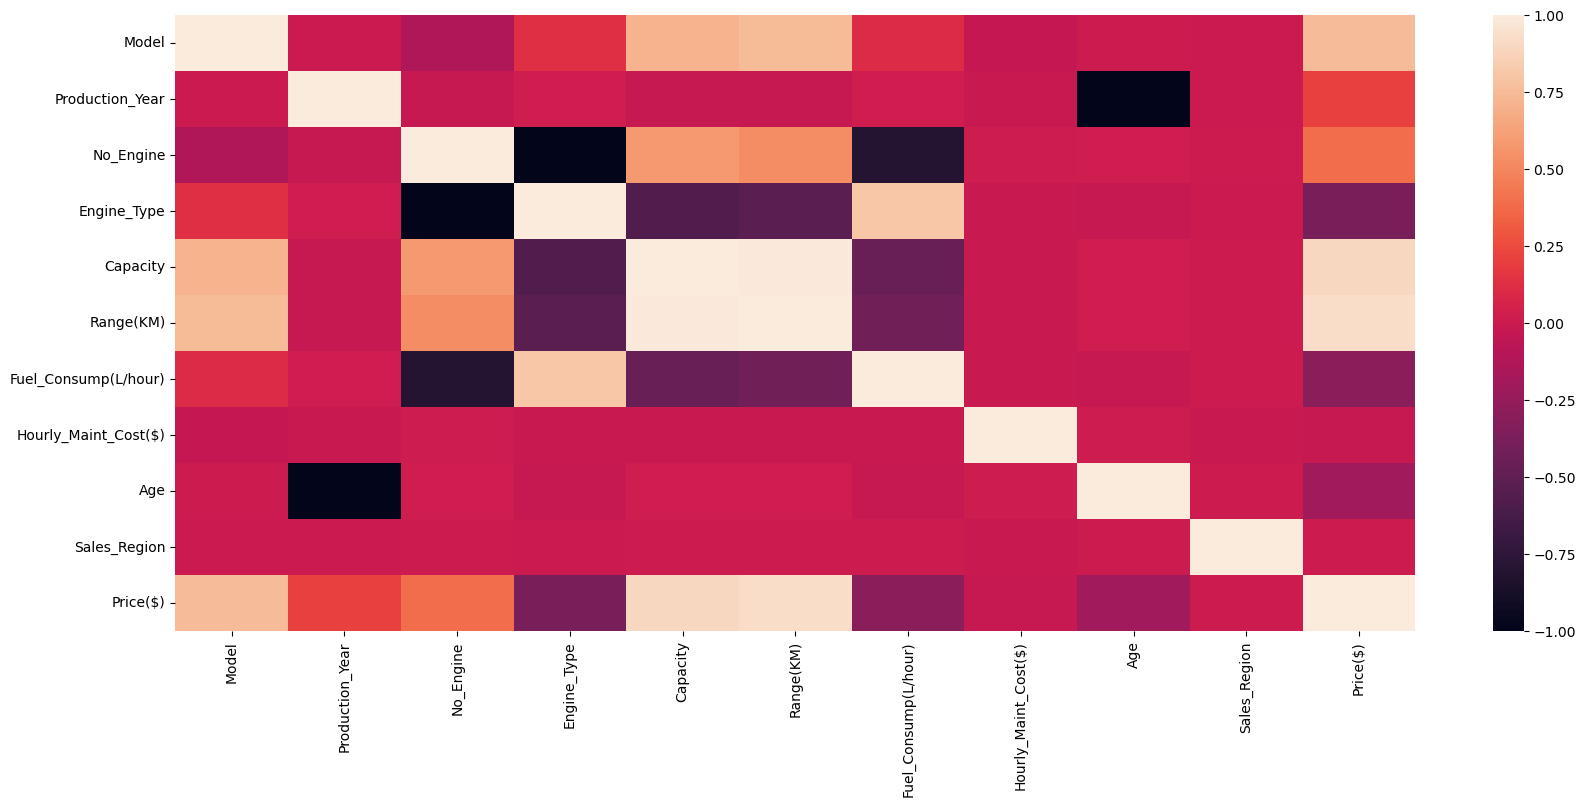

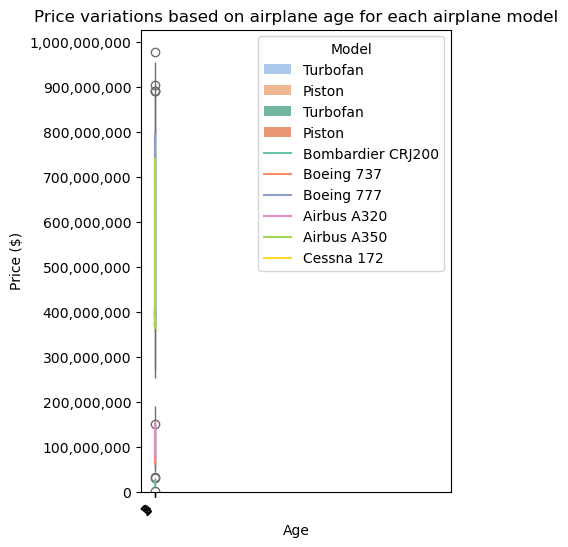

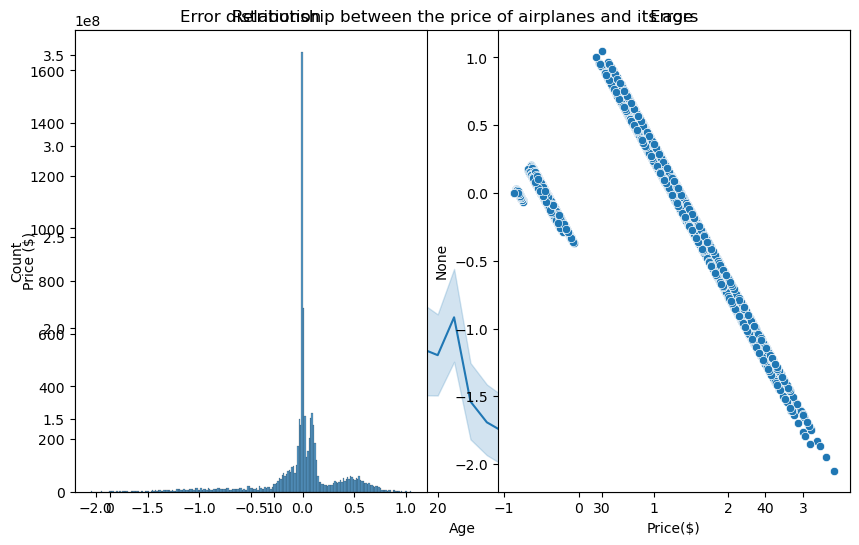

In [236]:
plt.rcParams['figure.figsize']= (20,8)
y_train_pred = lnr_model.predict(X_train_sm)
res = y_train_pred - y_train
plt.subplot(1,2,1)

sns.histplot(res)

plt.title ("Error distribution")
plt.subplot(1,2,2)
plt.title ("Errors")
sns.scatterplot(x= y_train , y= res)

plt.show()

A steep decline in error distribution. This might indicate that error values have relation with model and a few missing variables have not been counted